-Developed By: Akansha Agarwal
<br>
akurox123@gmail.com

# **<u>Introduction:</u>**

<font color=red>**The global mobile gaming market could grow from 56 dollars billion in revenue in 2017 to 106.4 dollars billion in 2021, according to a recent report by Newzoo and Arm**</font>



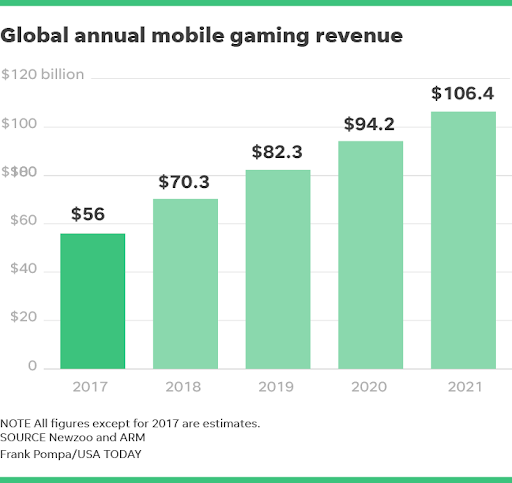



**The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.**


# <u>Objective:</u>

###  **To expose the best combination for strategy games available in the appstore in order to get a good user rating (4.0/5.0 and above).**

***



# <u>Importing packages, collecting data and performing Data Preparation by cleaning the data and removing null values:</u>



In [21]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Special Visualization'''
import missingno as msno

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

'''Reading the data from csv files'''
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\minor project/appstore_games.csv', header = None)

'''Replacing header with top row'''
data.columns = data.iloc[0]
data = data[1:]

display(data.head(5))
print('Dimension of data:', data.shape)


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
1,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4,3553,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
2,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
3,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3,8376,0,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
4,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394,0,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
5,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Dimension of data: (17007, 18)


In [22]:
'''Determing the total count of null values, of each column of the dataset.'''

data.isnull().sum()

0
URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

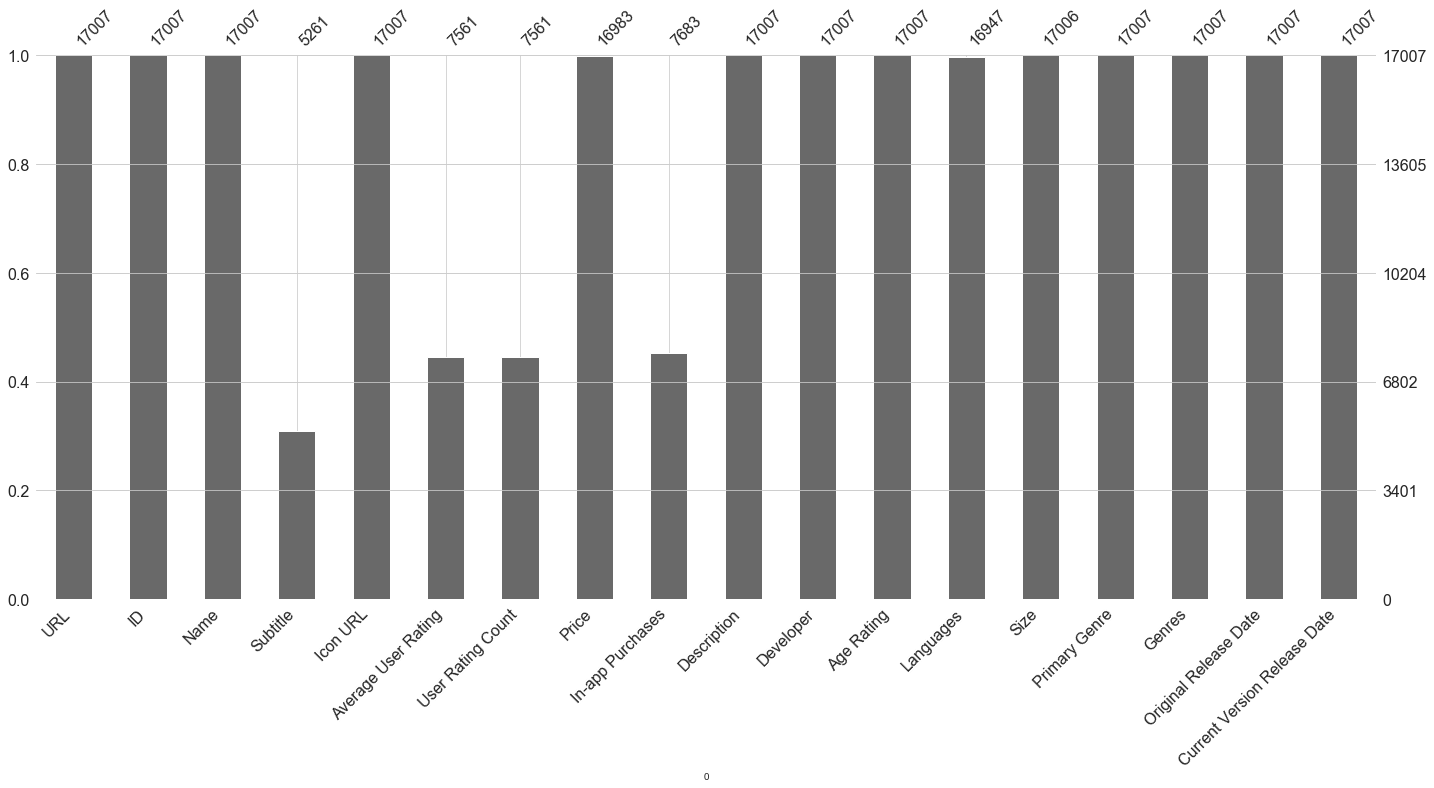

In [23]:
'''Data Visualization of missing values in dataset'''
msno.bar(data) 

### Above bar chart depicts that <font color=green>Subtitle, Average User Rating, User Rating Count and In-app Purchases</font> contain the most number of missing values.
<br>

In [24]:
'''Dropping the rows with missing values'''
# mark zero values as missing or NaN
data = data.replace(0, np.NaN)
# drop rows with missing values
data.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(data.shape)
print("ALL NULL VALUES HAS BEEN REMOVED!!")
# Demonstrating that all null values has been removed.
data.isnull().sum()



(1935, 18)
ALL NULL VALUES HAS BEEN REMOVED!!


0
URL                             0
ID                              0
Name                            0
Subtitle                        0
Icon URL                        0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

***
<br>

# <u>Identifying the <font color=lime>genres</font> which are most significant</u>

**MOST POPULAR GENRE**

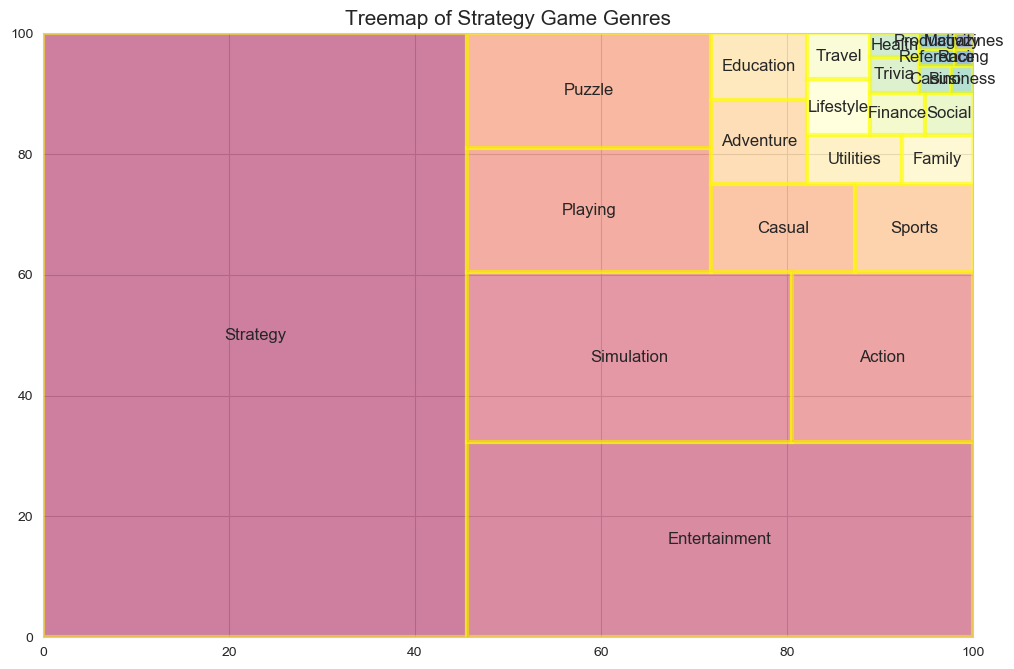

In [25]:
bold('**MOST POPULAR GENRE**')
import squarify

data['Genreslist'] = data['Genres'].str.extract('([A-Z]\w{5,})', expand=True)
temp_df = data['Genreslist'].value_counts().reset_index()

sizes=np.array(temp_df['Genreslist'])
labels=temp_df['index']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="yellow", linewidth=3, text_kwargs={'fontsize':12})
plt.title('Treemap of Strategy Game Genres', fontsize = 15)
plt.axis('on')
plt.show()

### Above treemap shows, <font color=orange>Strategy</font> is the most popular genre, followed by  <font color=orange>Entertainment and Simulation.</font>

***

<br>

#  _<u><font color=red>Analysis of DISTRIBUTION according to GENRES</font></u>_

<BR>
    
## <font color=cornflowerblue>1.MOST REVIEWED GENRE [Higher user rating]</font>


In [26]:
review = data.sort_values(by='User Rating Count', ascending=False)[['Name', 'Average User Rating','Genres', 'User Rating Count', ]].head(8)
review.iloc[:, 0:-1]

,Name,Average User Rating,Genres
2654,Forge of Empires: Build a City,4.5,"Games, Simulation, Strategy, Entertainment"
8288,Trump Tycoon : Politics Game,4.5,"Games, Strategy, Entertainment, Role Playing"
10545,Pro 11 - Soccer Manager Game,4.5,"Games, Sports, Sports, Strategy"
7706,Conceptis Cross-a-Pix,4.5,"Games, Puzzle, Entertainment, Strategy"
12866,"""Papa's Hot Doggeria To Go!""",4.5,"Games, Strategy, Simulation"
16310,Epic War - Castle Alliance,4.5,"Games, Role Playing, Strategy"
13294,Cooking Madness-Kitchen Frenzy,4.5,"Games, Casual, Strategy"
820,Majesty: Fantasy Kingdom Sim,4.5,"Games, Action, Strategy, Entertainment"


### <font color=darklimegreen>We see that in above analysis, the most reviewed games are: <font color=orange> *Epic War - Castle Alliance,"Papa's Hot Doggeria To Go!" , Cooking Madness-Kitchen Frenzy*.</font> Each of them have <u>Average User Rating of 4.5</u> and all of them have common genre - <font color=orange> STRATEGY.</font> </font>

## <font color=cornflowerblue>2.GENRE vs In-app Purchases and Price </font>

In [27]:
review = data.sort_values(by=['Price','In-app Purchases'], ascending=False)[['Name','Genres','In-app Purchases','Price',]].head(8)
review.iloc[:, 0:-1]

,Name,Genres,In-app Purchases
3154,Tarot - Single and Multiplayer,"Games, Strategy, Card, Entertainment","1.99, 1.99, 1.99, 1.99"
674,Ticket to Ride,"Games, Board, Entertainment, Strategy","0.99, 2.99, 2.99, 2.99, 2.99, 2.99, 2.99, 2.99..."
5384,Carrier Battles 4 Guadalcanal,"Games, Simulation, Strategy, Education","0.99, 0.99, 0.99, 0.99, 0.99, 1.99, 2.99"
11786,Realpolitiks Mobile,"Games, Simulation, Strategy, Entertainment","2.99, 2.99"
324,Blood & Honor No Ads,"Games, Board, Strategy, Entertainment","9.99, 4.99, 9.99, 0.99, 2.99, 0.99, 4.99, 0.99..."
9561,Siralim 2 (Monster Taming RPG),"Games, Role Playing, Strategy","9.99, 4.99"
10170,Panthera Frontier,"Games, Entertainment, Adventure, Strategy","9.99, 24.99, 4.99, 1.99, 1.99, 5.99, 0.99"
16306,Santorini Board Game,"Games, Entertainment, Strategy, Board","7.99, 0.99, 1.99, 0.99, 1.99, 1.99, 3.99, 5.99"


### <font color=darklimegreen>We see that in the above analysis, <font color=orange>Ticket to Ride , Blood & Honor No Ads </font> has the most number of In-App Purchases made.The game falls under the following genres: <font color=orange>Board, Entertainment and Strategy</font>.</font>

## <font color=cornflowerblue>3.Genre vs Size </font>

In [28]:
review = data.sort_values(by='Size', ascending=True)[['Name','Genres','Size','Genres']].head(8)
review.iloc[:, 0:-1]

,Name,Genres,Size
3239,Haypi Adventure,"Games, Strategy, Simulation, Entertainment",100304896
14727,Castle Fusion,"Games, Strategy, Action",100401152
2675,Mazebert TD,"Games, Simulation, Strategy",100454400
4905,Space Punks - Invaders Clash,"Games, Education, Puzzle, Strategy",100673536
13477,Space Station Simulator,"Games, Strategy, Entertainment, Simulation",100813824
11612,Jurassic World Alive,"Games, Strategy, Adventure",1009284096
16227,Hearth Keeper,"Games, Utilities, Strategy, Card",100944896
2573,Glory of Generals: Pacific War,"Games, Simulation, Strategy",101043200



***

<br>

#  _<u><font color=red>*Identifying trends of user rating based on pricing.*</font></u>_


# <font color=cornflowerblue>1.Price</font>

****MOST OF THE APPS PRICES BETWEEN 0 TO 10 DOLLARS****

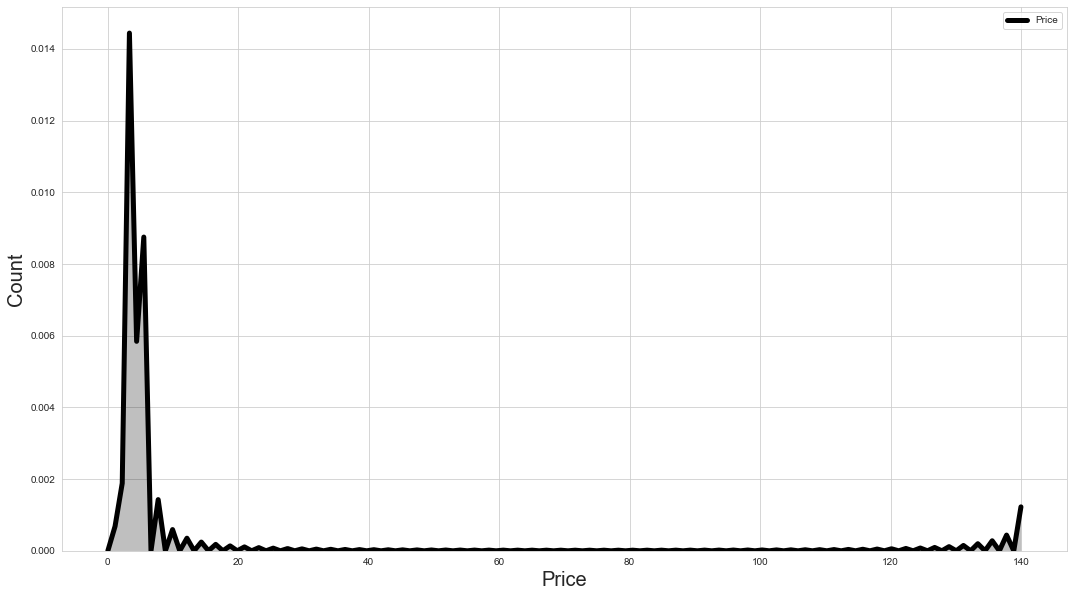

In [29]:
bold('****MOST OF THE APPS PRICES BETWEEN 0 TO 10 DOLLARS****')
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.kdeplot(data['Price'], shade = True, linewidth = 5, color = 'k')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()

### <font color=darklimegreen>MOST OF THE APPS PRICES BETWEEN<font color=orange> 0 TO 10 DOLLARS </font></font>


# <font color=cornflowerblue>2.Price vs Average User Rating</font>

In [30]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(                
                x=data['Average User Rating'],
                y=data['Price'],
                mode='markers'))

fig.update_yaxes(range=[0, 20])

fig.update_layout(title_text='Price vs Average User Rating',
    xaxis_title_text='Average User Rating',
    yaxis_title_text='Price in $',)
fig.show()

### <font color=darklimegreen>We see that in the above analysis,upto <font color=orange> $8.99 </font> is spent by users giving an Average User Rating of <font color=orange>4.5</font></font>

### Most of the apps are rated good with rating 3.5 - 4.5

*** 

<br>

# _<font color=darkblue><u>*Some more TRENDS:*<u></font>_


# <font color=cornflowerblue>1.Developers</font>

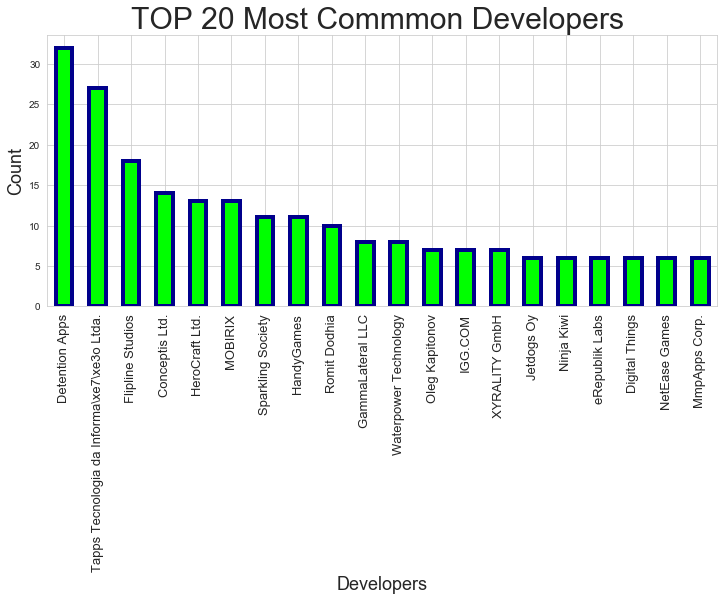

In [31]:
plt.rcParams['figure.figsize'] = (12, 5)
data.Developer.value_counts()[:20].plot(kind='bar',color = 'lime', alpha =1, linewidth=4, edgecolor='darkblue')
plt.xlabel("Developers", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 20 Most Commmon Developers ", fontsize=30)
plt.xticks(rotation=90, fontsize = 13) 
plt.show()

### <font color=darklimegreen>We see that in the above analysis <font color=orange>DETENTION APPS</font> has developed the most no. of apps.</font>


***

<br>



# <font color=cornflowerblue>2.Age Rating</font>

In [32]:
'''A Function To Plot Pie Plot using Plotly'''
'''Takes time to load, click on run twice'''
def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.5,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold('**MOST OF THE APPS HAVE 4+ AGE RATING**')
py.iplot([pie_plot(data['Age Rating'].value_counts(), ['lightlime', 'gold', 'red'], 'Age Rating')])

**MOST OF THE APPS HAVE 4+ AGE RATING**

### <font color=darklimegreen>We see that in the above analysis, <font color=orange>50.3%</font> of apps have age rating of <font color=orange>4+ (4 and above)</font>.</font>


***

<br>


# <font color=cornflowerblue>3.Correlation:</font>



### <font color=chocolate> ~ Correlation is about the <u>_relationship between variables_.</u><br><br> ~ Correlation values range between -1 and 1.<br> ~ There are two key components of a correlation value:<br><br>1]<font color=red> _magnitude_ </font>  – The larger the magnitude (closer to 1 or -1), the stronger the correlation.<br>2]<font color=red> _sign_ </font>  – If negative, there is an inverse correlation. If positive, there is a regular correlation.</font>
<br>

In [33]:
data['GenreList'] = data['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
data['GenreList'].head()

6             [Entertainment, Strategy, Puzzle]
20            [Strategy, Puzzle, Entertainment]
76         [Entertainment, Adventure, Strategy]
91     [Entertainment, Strategy, Role, Playing]
107                          [Strategy, Puzzle]
Name: GenreList, dtype: object

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

test = data['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

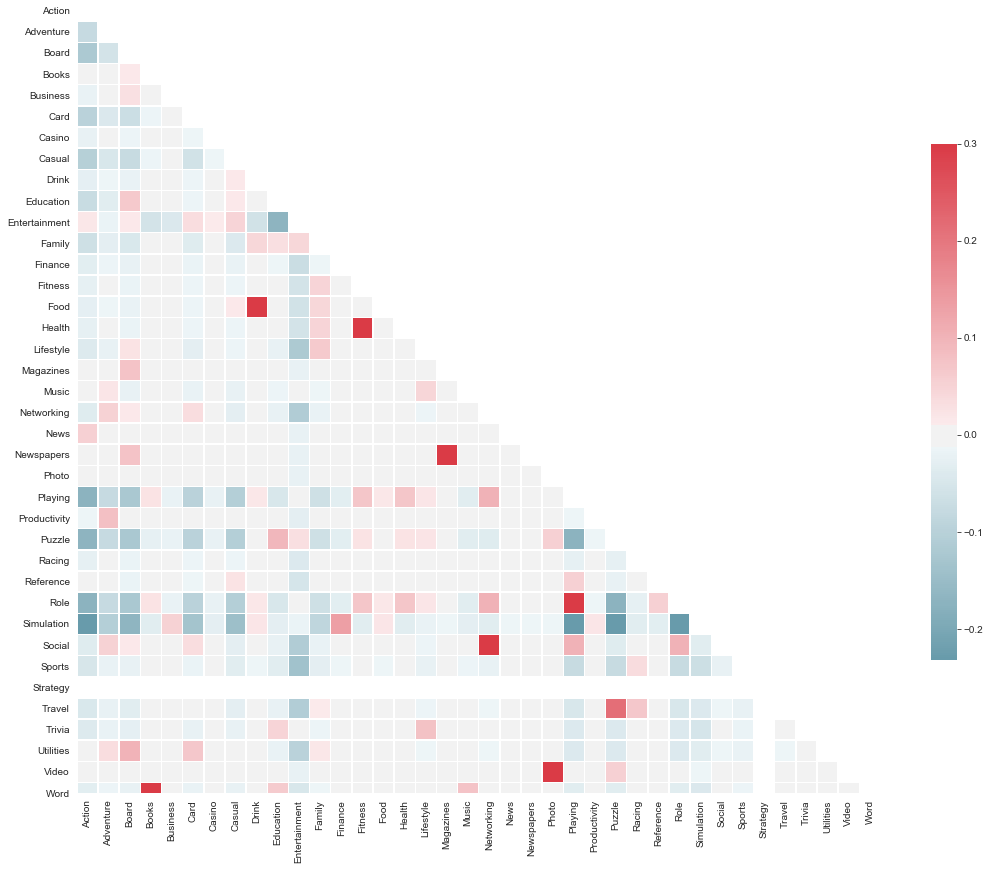

In [35]:
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

  
### <font color=darklimegreen>Here,the colour<font color=red> _red_ </font>indicates a stronger relationship b/w two values.<br><br>For eg:<br>     1] <font color=orange>Word and Books </font>are related strongly (magnitude=0.3).<br>     2] <font color=orange>Role and puzzle</font> are not that related (magnitude= -0.2).<br>     3] <font color=orange>Video and Photo</font> are strongly related (magnitude= 0.3).</font></font>


***

<br>

# <font color=cornflowerblue>4.Most EXPENSIVE Games:</font>
<br>

In [36]:
data.dropna(inplace = True)
price = data.sort_values(by='Price', ascending=False)[['Name', 'Price', 'Average User Rating','Genres', 'Size', 'Icon URL']].head(8)
price.iloc[:, 0:-1]

,Name,Price,Average User Rating,Genres,Size
3154,Tarot - Single and Multiplayer,8.99,4.5,"Games, Strategy, Card, Entertainment",118064128
674,Ticket to Ride,6.99,4,"Games, Board, Entertainment, Strategy",668668928
5384,Carrier Battles 4 Guadalcanal,6.99,4.5,"Games, Simulation, Strategy, Education",85874688
11786,Realpolitiks Mobile,5.99,3.5,"Games, Simulation, Strategy, Entertainment",204593152
402,Catan Classic HD,4.99,4,"Games, Board, Strategy, Entertainment",812956672
432,"""Sally's Spa HD""",4.99,4,"Games, Entertainment, Action, Strategy",252247040
2817,Hitman GO,4.99,4.5,"Games, Puzzle, Strategy",1106128896
6523,Deus Ex GO,4.99,4.5,"Games, Strategy, Puzzle",301735936


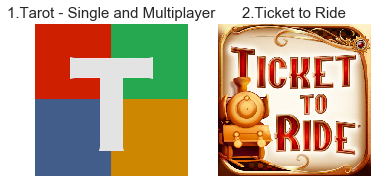

In [37]:
import urllib.request
from PIL import Image

plt.figure(figsize=(6,3))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(price.iloc[0,-1]))
plt.title('1.Tarot - Single and Multiplayer', fontsize=15)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(price.iloc[1,-1]))
plt.title('2.Ticket to Ride', fontsize=15)
plt.imshow(image)
plt.axis('off')

plt.show()

### <font color=darklimegreen>We see that in the above analysis, <font color=orange>Tarot - Single and Multiplayer</font> and <font color=orange>Ticket to Ride </font>are the two most expensive apps in the appstore.<br><br><font color=orange>Carrier Battles 4 Guadalcanal</font> and <font color=orange>Realpolitiks Mobile</font> are the 3rd and 4th most expensive apps as shown below.</font>

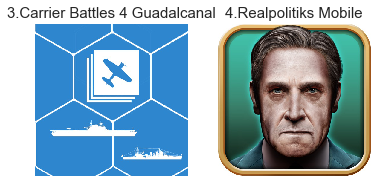

In [38]:
import urllib.request
from PIL import Image

plt.figure(figsize=(6,3))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(price.iloc[2,-1]))
plt.title('3.Carrier Battles 4 Guadalcanal', fontsize=15)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(price.iloc[3,-1]))
plt.title('4.Realpolitiks Mobile', fontsize=15)
plt.imshow(image)
plt.axis('off')

plt.show()

***

<br>

# <u>INFERENCES</u>

# <font color='aqua'>Best Overall Game in App Store</font>




In [39]:
best = data.sort_values(by=['Average User Rating', 'User Rating Count'], ascending=False)[['Name', 'Average User Rating', 'User Rating Count', 'Size', 
                                                                                         'Price', 'Developer',  'Icon URL',]].head(10)
best.iloc[:, 0:-1]

,Name,Average User Rating,User Rating Count,Size,Price,Developer
1650,Bloons TD 5,5,97776,133326848,2.99,Ninja Kiwi
16163,Cooking Hot Cooking Games,5,9706,251574272,0,FlyBird Limited
5478,Gem Quest - Jewel Games Puzzle,5,969,94669824,0,Miik Limited
11088,Angry Drunks,5,96,106083328,0,Angry Apps
13580,Skylanders\u2122 Ring of Heroes,5,9586,197530624,0,Com2uS Corp.
16360,Resurrection of Heroes,5,95,629170176,0,IGG.COM
16264,Chef Craze - Food Cooking Game,5,94,173999104,0,Lapusanu Patriciu
9537,Total Sudoku,5,9,103315456,0,Emir Canpolat
12827,Grav-Ball,5,9,30389248,0,SpurDawgDev LLC
16297,"Farm, Inc.",5,9,56972288,0,Picsoft Studio


**Bloons TD 5 Game Develop by Ninja Kiwi**

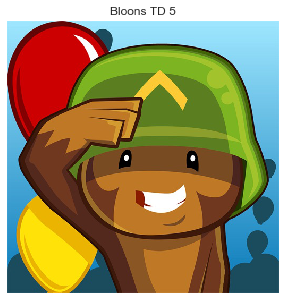

In [40]:
bold('**Bloons TD 5 Game Develop by Ninja Kiwi**')
plt.figure(figsize=(5,5))
image = Image.open(urllib.request.urlopen(best.iloc[0, -1]))
plt.axis('off')
plt.title('Bloons TD 5')
plt.imshow(image)
plt.show()


### <font color=darklimegreen><font color=orange>Bloons TD 5</font> turns out to be best overall game with <font color=orange>5.0 rating</font> and <font color=orange>97776</font> reviews.<br>There are also several other Games with 4.0+ rating and healthy number of reviews</font>


***

<br>



## To conclude,<br><br>1.Games under <u>genre</u>: <font color='aqua'>Strategy,Entertainment</font> and <font color='aqua'>Simulation</font>,<br>2.<u>Priced</u> at not more than <font color='aqua'> $ 10 </font> and <br>3.With <u>Age Rating</u> <font color='aqua'> 4+ </font><br><br> tend to get a good user rating  (4.0/5.0 and above).